In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx

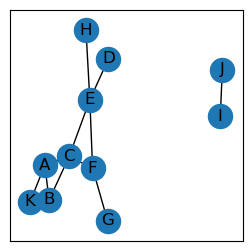

In [6]:
G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'K'), 
('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('I', 'J')])

plt.figure(figsize=(3,3))
nx.draw_networkx(G)

# Triadic Closure

개별 Node의 연결성은 Local Clustering Coefficient로 측정한다 (삼각형을 형성하는 경향을 측정한다)

---

Whole network에 대한 측정은 두가지 방식이 있다

    1. 모든 노드에 대해 LCC를 평균

    2. Network의 triangles에서 "open triads"의 퍼센트 계산하기 (Transitivity라고 부른다)

Transitivity는 높은 degree(이웃)를 가진 노드에 weight를 부여한다


In [9]:
# 개별 Node의 LCC구하기 (F,A)
nx.clustering(G,"F") , nx.clustering(G,"A")

(0.3333333333333333, 0.6666666666666666)

In [12]:
# Average local clustering coefficient
nx.average_clustering(G)

0.28787878787878785

In [11]:
# Transitivity 
nx.transitivity(G)

0.4090909090909091

# Distance & Path

Breath-First Search : 트리를 만들면서 아직 발견하지 못한 Node로 가지를 치면서 내려간다

---
**거리측정 Metric**

Average distance : 모든 노드 사이의 평균 거리

Diameter : 노드 쌍 사이의 가능한 최대 거리

Eccentricity : 각 노드에서 가능한 최대 거리

Radius : 그래프에서 최소 Eccentricity

Periphercy : Eccentricity가 diameter과 같은 노드 (가장 외곽에 위치한 노드라고 직관적 해석 가능)

Center : Eccentricity가 Radius와 같은 노드 (중심이라고 해석 가능)

In [16]:
# 사용할 그래프 생성
G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('B', 'K'), ('B', 'C'),  
('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ("E","I"), ('F', 'G'), ('I', 'J')])

In [26]:
# Breath-First Search
T = nx.bfs_tree(G,"A")

print(T.edges())

nx.shortest_path_length(T,"A")

[('A', 'K'), ('A', 'B'), ('B', 'C'), ('C', 'E'), ('C', 'F'), ('E', 'D'), ('E', 'H'), ('E', 'I'), ('F', 'G'), ('I', 'J')]


{'A': 0,
 'K': 1,
 'B': 1,
 'C': 2,
 'F': 3,
 'E': 3,
 'I': 4,
 'D': 4,
 'G': 4,
 'H': 4,
 'J': 5}

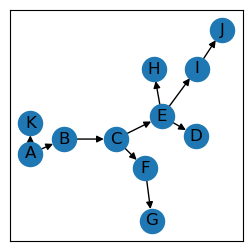

In [24]:
# 찾은 트리 그려보기
plt.figure(figsize=(3,3))

pos = nx.spring_layout(G)   #layout은 노드 위치를 정할 알고리즘을 구하는 것임
nx.draw_networkx(T, pos=pos)

In [27]:
# Average Distance
nx.average_shortest_path_length(G)

2.5272727272727273

In [ ]:
# Eccentricity
nx.eccentricity(G)

In [32]:
# Diameter       # radius
nx.diameter(G) , nx.radius(G)

(5, 3)

In [33]:
# Periphery      # center
nx.periphery(G), nx.center(G)

(['A', 'K', 'J'], ['C', 'E', 'F'])

# Connectivity

Undirected인 경우 : 그냥 연결성 따진다

Directed인 경우 : Strong, Weak가 있다

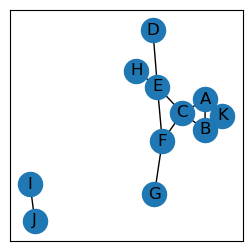

In [43]:
# 사용할 그래프 생성
G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'K'), 
('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('I', 'J')])

plt.figure(figsize=(3,3))
nx.draw_networkx(G)

In [41]:
nx.is_connected(G)

False

In [44]:
# 연결된 군집이 몇개인가
nx.number_connected_components(G)

2

In [45]:
# 연결된 군집의 Node 출력
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'K'}, {'I', 'J'}]

In [47]:
nx.node_connected_component(G,"I")

{'I', 'J'}

In [48]:
#nx.is_strongly_connected(G)
#nx.is_weakly_connected(G)

#nx.strongly_connected_components(G)
#nx.weakly_connected_components(G)

# Robustness in Networks

Node나 Edge가 사라지는 Attack이 있을 때, Network가 연결성을 유지할 경우 Robust하다고 한다

* 예시) 특정 공항이 문을 닫는 경우

In [50]:
# 사용할 그래프 생성
G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('B', 'K'), ('B', 'C'),  
('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ("E","I"), ('F', 'G'), ('I', 'J')])

In [53]:
# 몇개의 edge를 없애면 연결성이 사라지는가
print(nx.edge_connectivity(G))

# 무슨 edge
nx.minimum_edge_cut(G)

1


{('E', 'I')}

In [57]:
# 몇개의 Node를 없애면 연결성이 사라지는가
print(nx.node_connectivity(G))

# 무슨 Node
nx.minimum_node_cut(G)

1


{'I'}

# Simple Paths

특정 노드에서 특정 노드로 Message를 전달하고자 할 떄, 가질 수 있는 paths

In [ ]:
# sorted(nx.all_simple_paths(G,"노드1","노드2"))